# 1. Import libraries and data set

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\01-2024 Instacart Basket Analysis'

In [3]:
# Importing data set

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_aggregated.pkl'))

In [5]:
# check the head

ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,departmend_id,order_id,user_id,order_number,orders_day_of_week,...,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,price_mean,spending_flag,days_since_last_order_median,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,19,3139998,138,28,6,...,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,19,1977647,138,30,6,...,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,19,389851,709,2,0,...,0,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,19,652770,764,1,3,...,0,Mid-range product,Least busy,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,19,1813452,764,3,4,...,1,Mid-range product,Least busy,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


# 2. Visualizations - Bar Charts 

Text(0.5, 1.0, 'Price Range of Products')

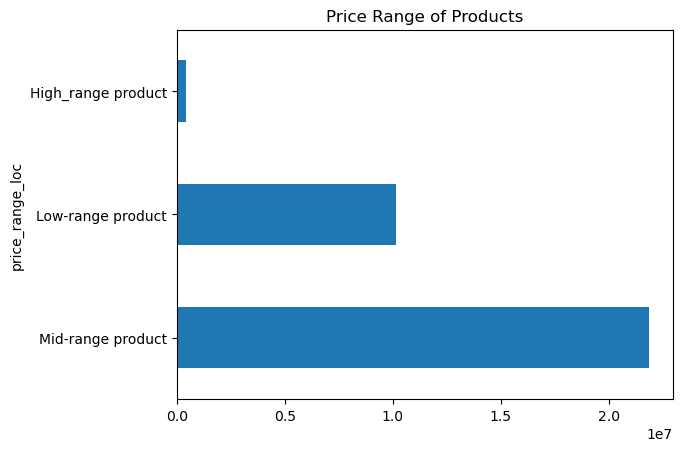

In [6]:
# Creating a Bar Chart

ords_prods_merge['price_range_loc'].value_counts().plot.barh()


# Set the title
plt.title('Price Range of Products')

<Axes: xlabel='orders_day_of_week'>

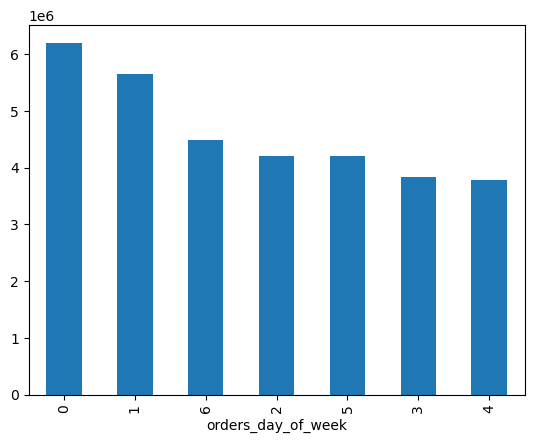

In [6]:
# Creating a Bar Chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

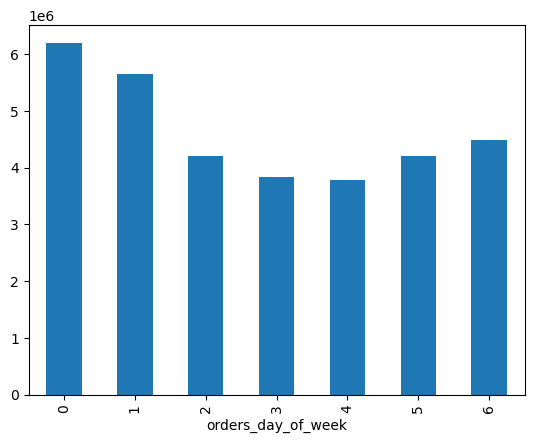

In [7]:
# Creating a Bar Chart, sort by the index order (listed chronologically Saturday - Friday)

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

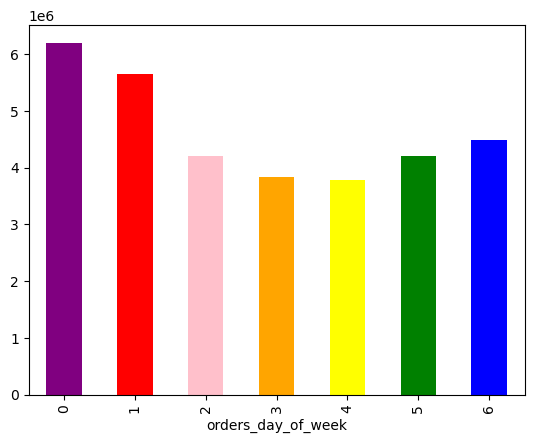

In [8]:
# Putting distinct colors in the bar chart

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# 3. Exporting Charts

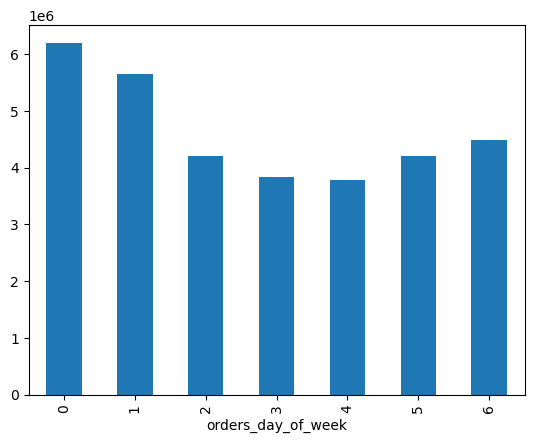

In [9]:
# save the chart within the 'bar' object, so it can be accessed any time by 'bar.figure'

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# Export it outside of Jupyter in the form of an image file using (figure.savefig() function)

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 4. Visualizations: Histograms and Scatterplots

## 4.1 Histograms

<Axes: ylabel='Frequency'>

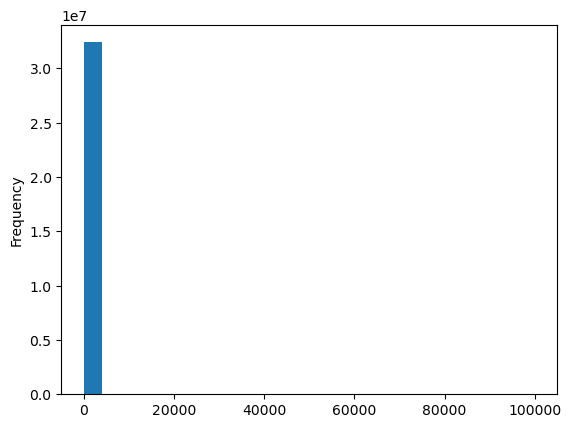

In [11]:
# Create a histogram for the 'prices'

ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
# Check the counts in 'prices'

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956459e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
# Check the mean in 'prices'

ords_prods_merge['prices'].mean()

11.980229

In [14]:
# Check the median in 'prices'

ords_prods_merge['prices'].median()

7.400000095367432

In [3]:
# Check the max in 'prices'

ords_prods_merge['prices'].max()

NameError: name 'ords_prods_merge' is not defined

## 4.2 Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

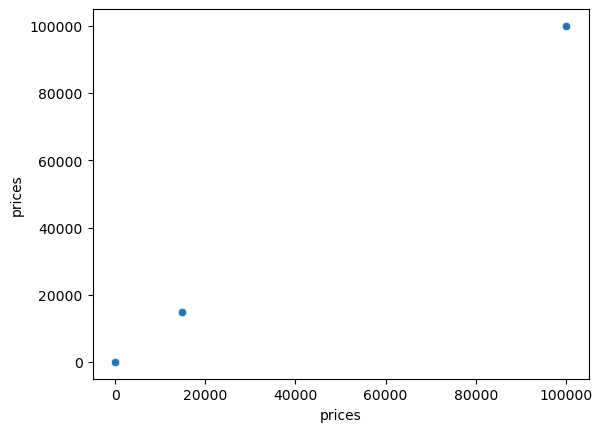

In [16]:
# Visualize the distribution of data points in order to identify any outliers in the current example 

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [17]:
# Check to identify outliers
## If the maximum price anyone would pay in a supermarket were around $100,
## then anything above that amount could be considered an outlier.

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,departmend_id,order_id,user_id,order_number,orders_day_of_week,...,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,price_mean,spending_flag,days_since_last_order_median,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,16,912404,17,12,2,...,0,High_range product,Regularly busy,Most orders,40,Regular customer,108.648300,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,16,603376,17,22,6,...,1,High_range product,Regularly busy,Average orders,40,Regular customer,108.648300,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,16,3264360,135,2,2,...,0,High_range product,Regularly busy,Average orders,4,New customer,1154.792236,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,16,892534,135,3,0,...,1,High_range product,Busiest days,Average orders,4,New customer,1154.792236,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,16,229704,342,8,1,...,0,High_range product,Busiest days,Average orders,16,Regular customer,114.426628,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,16,2249946,204099,29,0,...,0,High_range product,Busiest days,Average orders,39,Regular customer,1106.743896,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,16,2363282,204099,31,0,...,1,High_range product,Busiest days,Average orders,39,Regular customer,1106.743896,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,16,3181945,204395,13,3,...,0,High_range product,Least busy,Most orders,15,Regular customer,451.153534,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,16,2486215,205227,7,3,...,0,High_range product,Least busy,Average orders,12,Regular customer,1178.381836,High spender,12.0,Regular customer


In [18]:
# Mark the outliers as missing since they don’t make sense in terms of the other values in the column. 
# Turn them into NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [19]:
# Check the max value in 'prices'

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

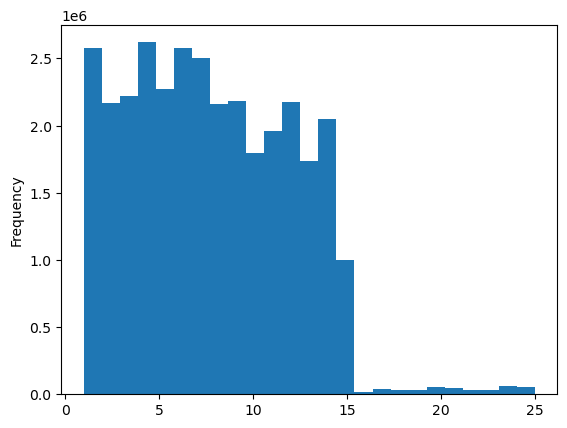

In [20]:
# # Create a histogram for the 'prices' again

ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

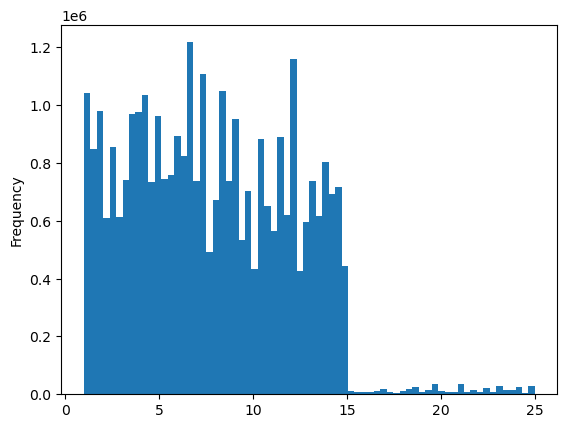

In [21]:
# increase the level of granularity in the histogram increasing the number of bins, 70

ords_prods_merge['prices'].plot.hist(bins = 70)

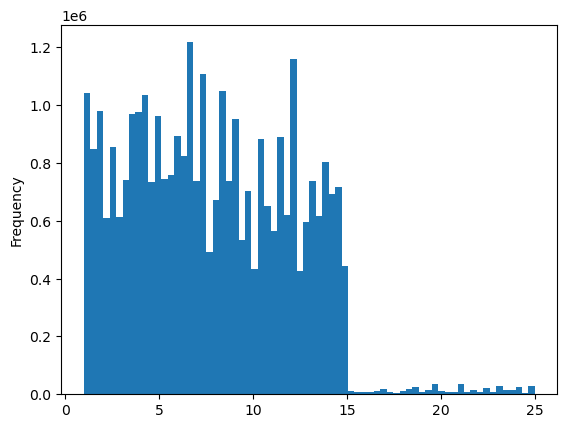

In [22]:
# Save the histogram with the 'hist' object

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [23]:
# Exporting the chart outside of Jupyter in the form of an image file using (figure.savefig() function)

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_dow.png'))

# 5. Visualizations: Line Charts

## 5.1 Sampling Data

In [24]:
# Creating a sample,splitting the dataframe into two dataframes at a 70/30 ratio.
# Create a list holding True/False values to test the np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
# Check the result

dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [29]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [30]:
# check the results, len from both subsets together should be equal to the original one

len(ords_prods_merge)

32404859

In [31]:
len(big) + len(small)

32404859

In [32]:
# reduce the sample to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” 

df_2 = small[['orders_day_of_week','prices']]

In [33]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


## 5.2 Line Charts

C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


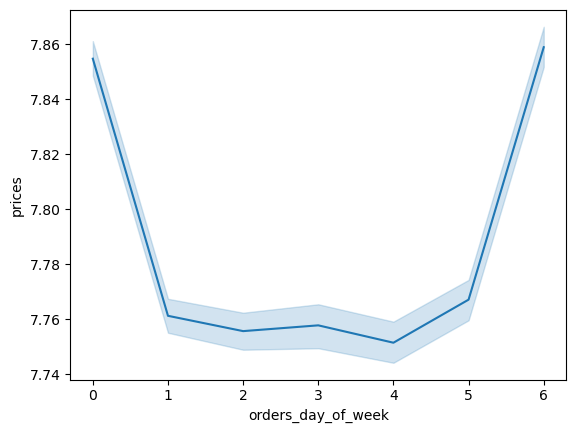

In [35]:
# Create a line chart 

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [37]:
# Exporting the line chart outside of Jupyter in the form of an image file using (figure.savefig() function)

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))